In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [2]:
dataset = tf.keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:

classes = {0: 'T-shirt/top',
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

In [4]:
xtrain.shape

(60000, 28, 28)

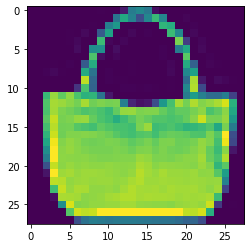

In [6]:
plt.figure()
plt.imshow(xtrain[100])
plt.show()

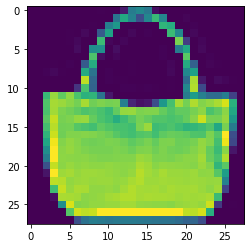

In [8]:
# scale to 0 and 1
# divide by 255-> 0/255->0,  255/255-> 1! else-> scales (0,1)   => (x-min)/ (max-min)
xtrain_scaled = xtrain/255.0
xtest_scaled = xtest/255.0
plt.figure()
plt.imshow(xtrain_scaled[100])
plt.show()

In [10]:
# Image classification

# Deep Learning ->
# ML-> generate trainable parameters
# Dense Layer or Fully Connected Layer!!!
# network-> 2 layers of Dense Layer!
# Dense layers-> accepts 1 Dimension input

# Flattening-> converts 2D image into 1-D sequence array
# 2 Dense Layers-> generate trainable parameters for this array

# NNL-> 3 layers-> Flatten -> Dense -> Dense 

from tensorflow import keras 
layer1 = keras.layers.Flatten(input_shape=(28,28))
layer2 = keras.layers.Dense(64, activation='relu')
layer3 = keras.layers.Dense(10)
all_layers = [layer1,layer2,layer3]
model = keras.Sequential(all_layers)

In [11]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'],
              optimizer='adam')

In [12]:
# SGD-> gradient descent
# RmsProp-> Root Mean Squared Propagation [calculate magnitude of mistake and move in that direction]
# RmsProp + Momentum -> adam optimizer [RmsProp with a momentum in the direction of correction]
#     -> closer to answer-> reduce LR, far away from answer-> increase the learning rate 

In [13]:
model.fit(xtrain_scaled, ytrain, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6580 - accuracy: 0.7764
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3955 - accuracy: 0.8593
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3616 - accuracy: 0.8696
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3318 - accuracy: 0.8803
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3158 - accuracy: 0.8842
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.8905
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.8957
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2740 - accuracy: 0.8991
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2629 - accuracy: 0.9039
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.259

In [16]:
test_loss,test_acc =model.evaluate(xtest_scaled, ytest, verbose=0)
print(test_acc)
print(test_loss)

0.8831999897956848
0.3581996560096741


In [26]:
trials = [42, 100, 33]
for trial in trials:
  predictions = model.predict(xtest_scaled)
  predictions[trial]
  correct_prediction = np.argmax(predictions[trial])
  print(correct_prediction)
  print(classes[correct_prediction])
  print('*******')

6
Shirt
*******
3
Dress
*******
3
Dress
*******


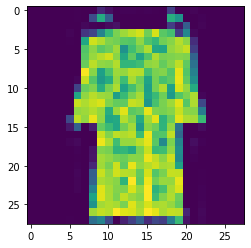

In [29]:
plt.figure()
plt.imshow(xtest_scaled[33])
plt.show()